Plot state variables in another format, not using axs.pcolor or pcolormesh bars

Try a figure with 7 narrow subplot strips. State will be plotted on 0-1 scale.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

import numpy as np
from numpy.lib.stride_tricks import sliding_window_view
%matplotlib widget

In [7]:
# read data from a csv file to a pandas df. First row is column index
df1 = pd.read_csv('test13_data_2.csv', sep=',', index_col=0)

In [8]:
# select arrays for plotting

# time is an array of x axis positions, in elapsed seconds
time = df1.loc[:, 'Elapsed'].to_numpy()

# Filter columns with state or State in the name.
df2 = df1.filter(regex='[Ss]tate')
ylabel = df2.columns

# values from dataframe and transpose for plotting
state_vals = df2.to_numpy().transpose()

In [9]:
color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 
              'C5', 'C6', 'C7', 'C8', 'C9']    # colors for plot lines

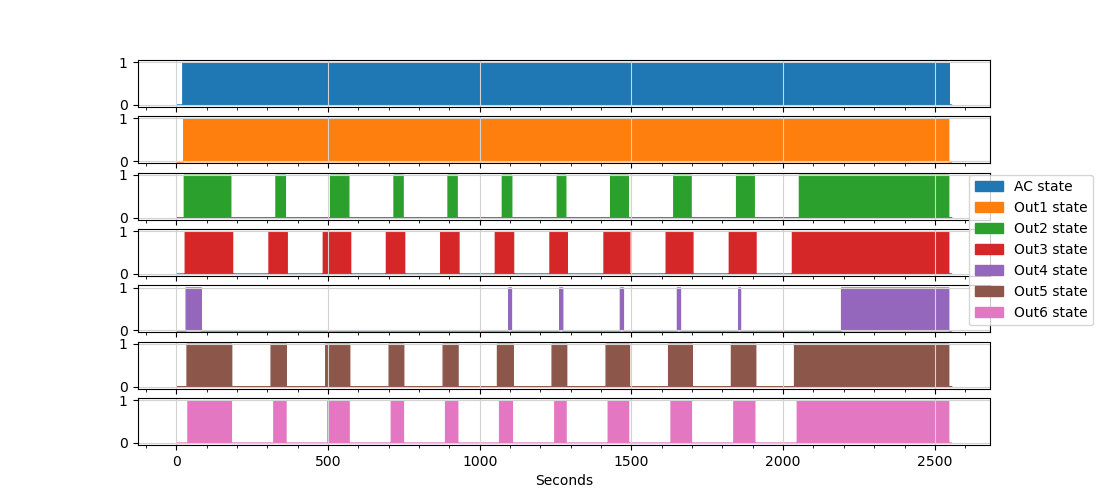

In [10]:
# clean up old plotting
try:
    del fig, axs
except NameError:
    pass

svn = state_vals.shape[0]    # number of states to plot
assert svn == len(ylabel), "Mismatched labels"
assert len(color_list) >= svn, "Not enough colors in the list"

# figure of subplots of state data
fig = plt.figure(figsize=(11, 5))
axs = fig.subplots(svn, sharex=True, sharey=False)    # subplots for each state

line_list = []    # empty list of plot lines for figure legend

# plot filled lines
for i, a in enumerate(axs):    # for each subplot
    line = a.fill_between(time, state_vals[i], 
                          y2 = 0, 
                          color = color_list[i], 
                          step = 'post', 
                          label = ylabel[i], )
    line_list.append(line)    # save handle for fig legend
    # a.set_yticks([0, 1], ['Off', 'On'])
    a.grid(color='lightgray')
    a.set_xlabel('Seconds')
    a.minorticks_on()
    a.tick_params(axis='y', which='minor', length=0)    # hide minor ticks on y axis
    a.label_outer()    # axis labels on left and bottom sides of subplots

plt.figlegend(handles=line_list, loc='right')    # overall figure legend

fig.savefig('state_plot.png', bbox_inches='tight')
# fig.show()